In [ ]:
# download the packages
! pip install scikit-learn
! pip install scipy
! pip install aspose-words

### Import third-party Library

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG

### Import Modules

In [29]:
import k_means
import png2svg_func
import svg2png_func
import mse_func

### Tranditional Method

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


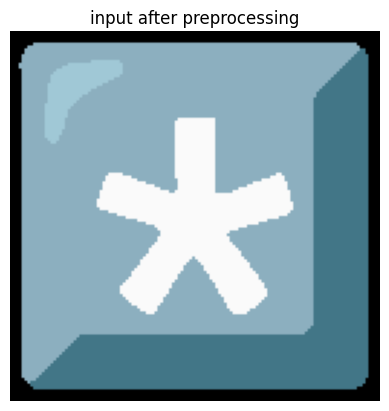

In [30]:
original = cv2.imread('../png/128/emoji_u002a_20e3.png')
img = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
img = k_means.coverting_img(img, 32)
img = png2svg_func.smooth_detail(img)
plt.title('input after preprocessing')
plt.axis('off')
plt.imshow(img)
img = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2BGR)
# cv2.imwrite('preprocess.png', img)


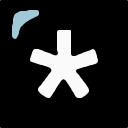

In [31]:
svg_image = png2svg_func.png2svg(img, 1)
with open('result.svg', 'w') as fh:
    fh.write(svg_image)
SVG('result.svg')

In [32]:
svg2png_func.svg2png('result.svg')
result = cv2.imread('result.png')
MSE = mse_func.calculate_mse(original, result)  # BGR
print(f'MSE = {MSE}')


MSE = 17114.149495442707


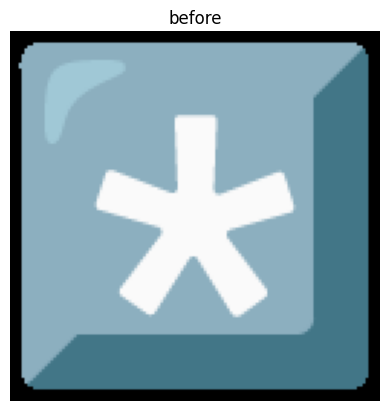

In [33]:
original_RGB = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.title('before')
plt.axis('off')
plt.imshow(original_RGB)


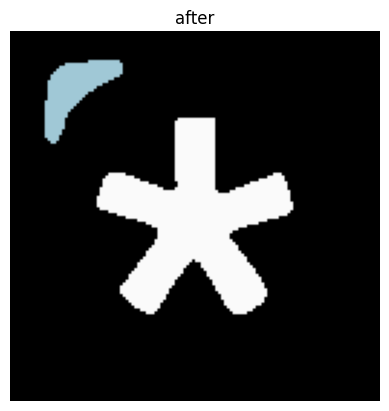

In [34]:
result_RGB = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.title('after')
plt.axis('off')
plt.imshow(result_RGB)
